In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electricity-load-forecasting/train_dataframes.xlsx
/kaggle/input/electricity-load-forecasting/continuous dataset.csv
/kaggle/input/electricity-load-forecasting/test_dataframes.xlsx
/kaggle/input/electricity-load-forecasting/weekly pre-dispatch forecast.csv


In [179]:
import numpy as np
import pandas as pd
df=pd.read_csv('../input/electricity-load-forecasting/continuous dataset.csv')
df

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
48044,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
48045,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1
48046,2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1


In [180]:
#Template------Priyobroto Acharya---------Jadavpur University-----------------------------------------------------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from collections import Counter
from sklearn.svm import SVC
import warnings
# Suppress scikit-learn warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
nat_demand,48048.0,1182.868647,192.068896,85.192500,1020.056900,1168.427700,1327.563950,1754.882000
T2M_toc,48048.0,27.399111,1.675462,22.953455,26.160455,27.118051,28.558344,35.039575
QV2M_toc,48048.0,0.018313,0.001607,0.012054,0.017236,0.018590,0.019521,0.022690
TQL_toc,48048.0,0.079979,0.065589,0.000000,0.026451,0.065201,0.117310,0.521240
W2M_toc,48048.0,13.391049,7.295502,0.008979,7.544958,12.182103,18.661282,39.229726
T2M_san,48048.0,26.921023,3.018129,19.765222,24.769281,26.167352,28.712335,39.063440
QV2M_san,48048.0,0.017844,0.001889,0.010247,0.016584,0.018351,0.019242,0.022165
TQL_san,48048.0,0.106265,0.086293,0.000009,0.036819,0.085968,0.157288,0.484985
W2M_san,48048.0,7.046675,4.103711,0.060394,3.955051,5.992762,9.409871,24.483937
T2M_dav,48048.0,24.719513,2.414019,19.933740,22.954652,24.001718,26.243402,34.216211


# **1. Checking for missing values :**
df.isnull().sum() succinctly gives you a Series object where each column name is paired with the count of missing values in that column. This is incredibly useful for initial data exploration and preprocessing tasks, allowing data analysts and scientists to quickly assess the extent of missing data in their dataset and decide on appropriate strategies for handling these missing values, such as imputation or exclusion from analysis. 
The presented output indicates the absence of missing values within the dataset under analysis. Each row in the output corresponds to a specific column name, while the numerical value adjacent to it denotes the count of missing values within that respective column. Notably, all counts are observed to be zero, signifying the complete absence of missing data (NaN or None) across all columns listed. This absence of missing values is pivotal in ensuring the integrity and reliability of the dataset for subsequent analysis or modeling endeavors. The absence of missing data obviates the need for imputation or corrective measures, thereby affirming the soundness of the dataset for rigorous analytical procedures.

In [109]:
df.isnull().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

<Axes: >

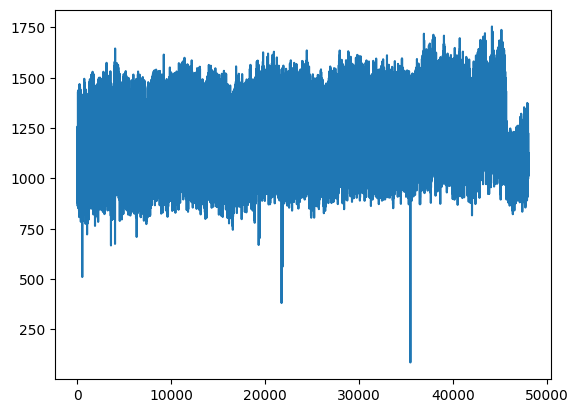

In [6]:
df["nat_demand"].plot()

# **2. frequency distribution of Demand**
This illustrates the frequency distribution of values within the 'nat_demand' column of the DataFrame. Each unique numerical value is displayed alongside the count of occurrences within the dataset. Specifically, the 'nat_demand' column exhibits a range of numerical values, each associated with a distinct count reflecting its frequency of occurrence. For instance, values such as 1003.9806, 1002.4377, 973.8241, 927.7455, and 956.2212 are each observed twice within the dataset. Moreover, the output indicates that there are a total of 47,909 unique values present within the 'nat_demand' column. This summary provides valuable insights into the distribution and variability of the 'nat_demand' data, which is essential for understanding patterns and trends within the dataset.

In [7]:
df['nat_demand'].value_counts()

nat_demand
1003.9806    2
1002.4377    2
973.8241     2
927.7455     2
956.2212     2
            ..
1186.5096    1
1218.7356    1
1197.0691    1
1153.4618    1
1013.5683    1
Name: count, Length: 47909, dtype: int64

# **3. Dealing With Date Time column:**
The provided code snippet performs a series of operations on a DataFrame named 'df' containing a column labeled 'datetime'. Firstly, the 'datetime' column is converted to the pandas datetime type using the `pd.to_datetime()` function. Subsequently, additional columns are created to extract various date and time-related components from the 'datetime' column. These components include the year, month number, day of the month, whether the date falls on a weekend (encoded as 0 or 1), the ISO week number, as well as the hour, minute, and second of the timestamp. These operations facilitate the decomposition of the timestamp data into its constituent temporal elements, thereby enabling more granular analysis and manipulation of temporal information within the dataset.
And after adding the columns the dataset finally looks like :


In [181]:
import pandas as pd

# Convert the datetime column to pandas datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract date and time related columns
df['date_year'] = df['datetime'].dt.year
df['date_month_no'] = df['datetime'].dt.month
df['date_day'] = df['datetime'].dt.day
df['date_is_weekend'] = (df['datetime'].dt.weekday >= 5).astype(int)  # Convert boolean to int (0 or 1)
df['date_week'] = df['datetime'].dt.isocalendar().week
df['hour'] = df['datetime'].dt.hour
df['min'] = df['datetime'].dt.minute
df['sec'] = df['datetime'].dt.second

df


,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,...,holiday,school,date_year,date_month_no,date_day,date_is_weekend,date_week,hour,min,sec
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,...,0,0,2015,1,3,1,1,1,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,...,0,0,2015,1,3,1,1,2,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,...,0,0,2015,1,3,1,1,3,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,...,0,0,2015,1,3,1,1,4,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,...,0,0,2015,1,3,1,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,...,0,1,2020,6,26,0,26,20,0,0
48044,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,...,0,1,2020,6,26,0,26,21,0,0
48045,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,...,0,1,2020,6,26,0,26,22,0,0
48046,2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,...,0,1,2020,6,26,0,26,23,0,0


In [236]:
train_df=df

In [237]:
train_df

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,...,holiday,school,date_year,date_month_no,date_day,date_is_weekend,date_week,hour,min,sec
0,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,...,0,0,2015,1,3,1,1,1,0,0
1,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,...,0,0,2015,1,3,1,1,2,0,0
2,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,...,0,0,2015,1,3,1,1,3,0,0
3,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,...,0,0,2015,1,3,1,1,4,0,0
4,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,...,0,0,2015,1,3,1,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,...,0,1,2020,6,26,0,26,20,0,0
48044,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,...,0,1,2020,6,26,0,26,21,0,0
48045,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,...,0,1,2020,6,26,0,26,22,0,0
48046,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,...,0,1,2020,6,26,0,26,23,0,0


 #  **4. Train – Test Split of the DataSet:**

 Firstly, the DataFrame `train_df` represents the dataset containing features and target variable for modeling. The variable `X` is derived from `train_df` by excluding the column 'nat_demand', which serves as the target variable of interest. Simultaneously, `y` is defined to specifically capture the 'nat_demand' column, representing the variable to be predicted. 
 Next, the `train_test_split` function from the `sklearn.model_selection` module is employed to partition the dataset into training and testing subsets. This division is pivotal for evaluating the performance of machine learning models. The parameters specified include `test_size=0.2`, which designates that 20% of the dataset will be allocated for testing, while the remaining 80% will constitute the training set. Additionally, `random_state=42` ensures reproducibility by fixing the random seed, thereby guaranteeing consistent results across multiple executions. 
 This preprocessing step is crucial as it facilitates the separation of data into distinct sets for model training (X_train and y_train) and evaluation (X_test and y_test). Such systematic preparation of data ensures robustness in assessing model performance and generalization to unseen data, essential for the validity and reliability of findings in machine learning research.


In [238]:
X = train_df.drop(columns=['nat_demand'])
y = train_df['nat_demand']


In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [239]:
X_train

,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,...,holiday,school,date_year,date_month_no,date_day,date_is_weekend,date_week,hour,min,sec
39623,26.576105,0.019807,0.072357,7.493484,25.216730,0.019303,0.110138,4.411643,23.372980,0.018159,...,0,1,2019,7,12,0,28,0,0,0
26601,27.416406,0.017600,0.130493,21.617335,26.900781,0.018088,0.187439,9.203218,23.783594,0.017493,...,0,0,2018,1,15,0,3,10,0,0
28871,27.030908,0.019511,0.052368,20.961102,25.843408,0.018122,0.057312,8.439482,23.921533,0.017298,...,0,1,2018,4,20,0,16,0,0,0
16293,26.234033,0.019744,0.077423,8.287791,25.304346,0.019767,0.155518,6.606283,23.171533,0.018257,...,0,1,2016,11,11,0,45,22,0,0
12668,27.437250,0.020119,0.103302,6.087760,26.124750,0.020447,0.248962,5.641792,24.124750,0.018799,...,0,1,2016,6,13,0,24,21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,26.456934,0.018083,0.019562,11.721672,24.910059,0.016847,0.017899,3.194772,22.925684,0.016351,...,0,1,2016,4,17,1,15,5,0,0
44732,26.225641,0.017272,0.013802,22.460305,23.678766,0.014850,0.021988,11.080551,22.124078,0.014541,...,0,0,2020,2,9,1,6,21,0,0
38158,26.764520,0.018792,0.008003,10.857207,26.295770,0.018846,0.053162,1.314561,23.858270,0.018037,...,0,1,2019,5,11,1,19,23,0,0
860,25.460077,0.015478,0.001777,17.211835,24.811639,0.015322,0.055862,9.288972,22.522577,0.015066,...,0,0,2015,2,7,1,6,21,0,0


In [240]:
y_train

39623    1113.3099
26601    1397.1628
28871    1160.9232
16293    1066.5749
12668    1210.1754
           ...    
11284     935.3807
44732    1251.3930
38158    1156.9696
860      1039.5453
15795     906.9531
Name: nat_demand, Length: 38438, dtype: float64

In [241]:
X_test

,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,...,holiday,school,date_year,date_month_no,date_day,date_is_weekend,date_week,hour,min,sec
45068,25.070886,0.015014,0.001614,22.384582,24.641199,0.014667,0.012634,12.324900,22.656824,0.014251,...,1,0,2020,2,23,1,8,21,0,0
15200,27.643365,0.018823,0.177063,3.140293,28.518365,0.018373,0.141846,1.153303,24.799615,0.017633,...,0,1,2016,9,27,0,39,9,0,0
17210,25.381799,0.018265,0.054886,18.067061,22.545862,0.016441,0.032028,6.459642,22.225549,0.015861,...,0,0,2016,12,20,0,51,3,0,0
30002,26.480127,0.020472,0.093414,7.074711,24.839502,0.019091,0.117645,4.520269,23.097314,0.018061,...,0,0,2018,6,6,0,23,3,0,0
18911,25.713800,0.015933,0.012634,23.044415,24.955988,0.016657,0.057083,9.564726,22.698175,0.015563,...,1,0,2017,3,1,0,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,27.093439,0.015946,0.006132,21.323690,26.812189,0.016831,0.033478,4.944891,25.484064,0.016487,...,0,0,2016,2,4,0,5,18,0,0
43187,28.496271,0.019176,0.282104,10.571214,28.754083,0.017863,0.173523,2.147735,25.754083,0.016864,...,0,1,2019,12,7,1,49,12,0,0
11690,25.941095,0.018923,0.045837,7.914815,24.737970,0.018587,0.064331,3.549464,23.347345,0.017802,...,0,1,2016,5,4,0,18,3,0,0
45782,31.403467,0.014563,0.000799,22.083046,36.325342,0.012259,0.020248,10.917464,31.200342,0.013815,...,0,1,2020,3,24,0,13,15,0,0


In [253]:
y_test

array([1124.563 , 1325.5949,  969.1594, ...,  944.7045, 1170.3642,
        909.8799])

### Data Preprocessing: Standardization

In the field of machine learning and data analysis, proper preprocessing of data plays a crucial role in enhancing model performance and ensuring reliable results. This section focuses on standardizing the features of the dataset to a consistent scale, which is imperative for many machine learning algorithms.

#### Standardization Process

Standardization, implemented using the `StandardScaler` class from the `sklearn.preprocessing` module, involves transforming the features such that they have a mean of zero and a standard deviation of one. Here’s a detailed breakdown of the process:

1. **Importing the StandardScaler**: The `StandardScaler` class is imported from the `sklearn.preprocessing` module. This scaler is used to center the data by removing the mean and scaling to unit variance.

2. **Fitting the Scaler**: The `scaler.fit_transform(X_train)` method is employed on the training dataset (`X_train`). This step computes the mean and standard deviation for each feature in `X_train` and then transforms `X_train` accordingly. This ensures that all features are centered around zero and have a standard deviation of one.

3. **Transforming the Test Data**: Once the scaler is fitted on `X_train`, it is then used to transform the test dataset (`X_test`). Importantly, `X_test` is transformed using `scaler.transform(X_test)` rather than `fit_transform(X_test)`. This approach ensures that the test data is scaled using the parameters (mean and standard deviation) learned from the training data, preventing data leakage and maintaining the integrity of the evaluation process.

#### Importance and Application

Standardization is essential for models that are sensitive to the scale of input features, such as linear regression, support vector machines, and neural networks. By standardizing the features, we ensure that each feature contributes equally to the model fitting process, thereby preventing biases that could arise from features with larger scales dominating those with smaller scales.

Furthermore, documenting this preprocessing step in research papers is crucial for transparency and reproducibility of results. It demonstrates rigorous data handling practices and ensures that subsequent analyses and interpretations are based on a standardized and comparable dataset. This not only enhances the reliability of findings but also facilitates the replication and extension of research by other scholars in the field.

In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Data Visualization: Boxplot Analysis of Scaled Training Data

In the realm of exploratory data analysis and feature visualization for machine learning research, the boxplot serves as a powerful tool for understanding the distribution and variability of data. This section focuses on visualizing the distribution of scaled features within the training dataset using Python's matplotlib and seaborn libraries.

#### Boxplot Analysis

The provided code segment employs the `matplotlib.pyplot` and `seaborn` libraries to generate and display a boxplot of the scaled training data (`X_train_scaled`). Here’s a detailed breakdown of the process:

1. **Importing Libraries**: The code imports essential libraries for data visualization: `matplotlib.pyplot` as `plt`, `seaborn` as `sns`, and `pandas` as `pd`. These libraries provide functionalities for creating plots and performing statistical visualizations.

2. **Figure Size**: The `plt.figure(figsize=(15, 8))` command sets the size of the figure to be created, ensuring optimal readability and presentation of the boxplot.

3. **Creating the Boxplot**: The `sns.boxplot(data=pd.DataFrame(X_train_scaled))` command utilizes seaborn's `boxplot` function to generate a boxplot of the scaled training data. `X_train_scaled` is first converted to a pandas DataFrame (`pd.DataFrame(X_train_scaled)`) to facilitate visualization.

4. **Customizing Plot Appearance**: Additional commands (`plt.xticks(rotation=90)`) adjust the appearance of the plot by rotating the x-axis labels for better visibility, particularly useful when dealing with a large number of features.

5. **Displaying the Plot**: Finally, `plt.show()` renders and displays the boxplot within the research paper or presentation.

#### Importance and Interpretation

Boxplots are instrumental in identifying the spread, skewness, and presence of outliers in the distribution of data. In the context of machine learning research, visualizing the scaled features allows researchers to assess the range and variability of each feature after standardization. This aids in detecting potential anomalies or discrepancies in the data distribution, guiding subsequent data preprocessing steps or model selection.

Including such visualizations in research papers enhances the clarity and comprehensibility of data exploration processes, providing readers with valuable insights into the characteristics and quality of the dataset used for model development. Additionally, documenting these visualization techniques ensures transparency and reproducibility, enabling fellow researchers to validate findings and build upon existing research in the field of machine learning and data analysis.

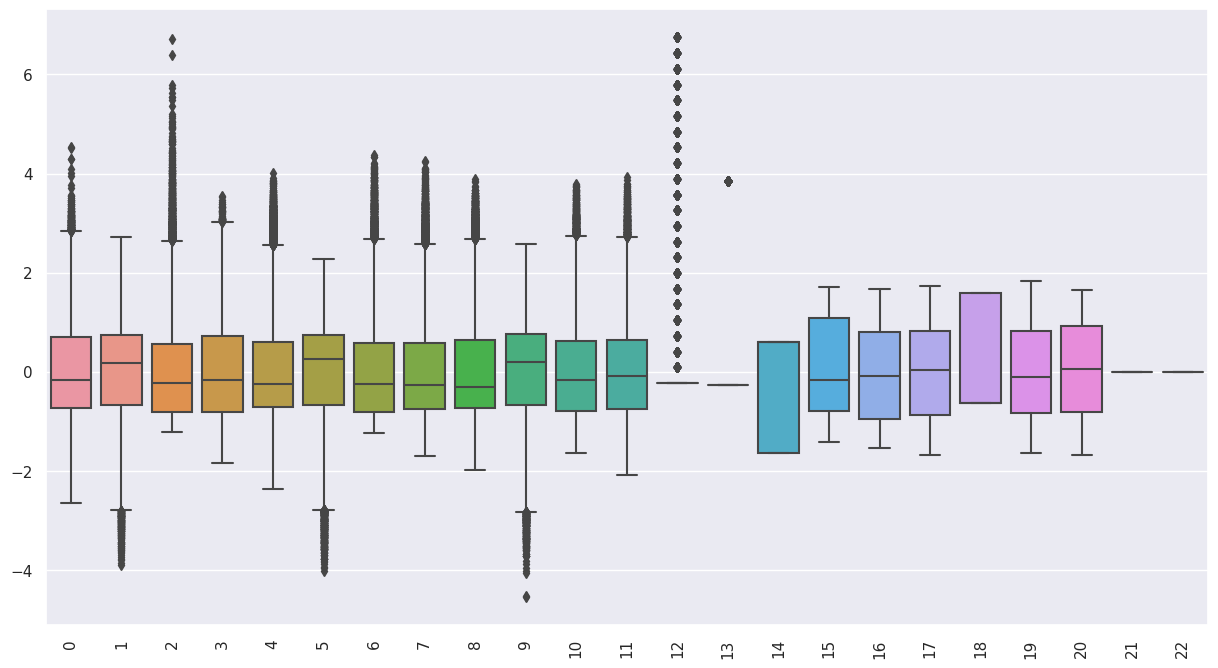

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(15, 8))
sns.boxplot(data=pd.DataFrame(X_train_scaled))
plt.xticks(rotation=90)
plt.show()


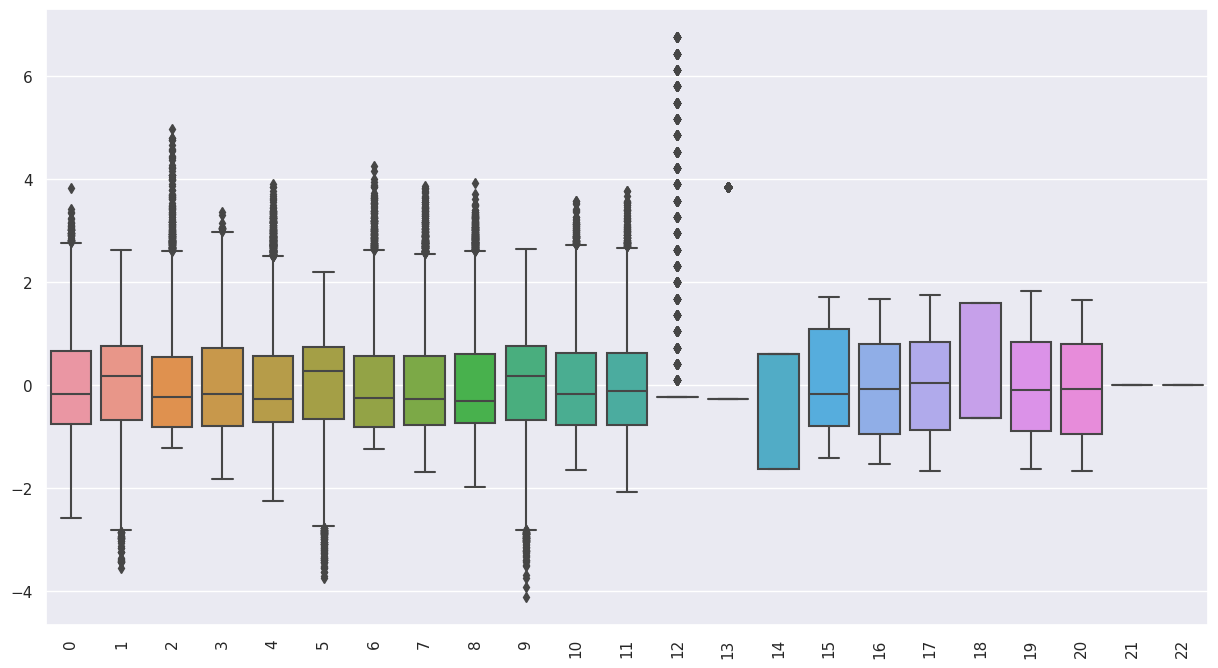

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(15, 8))
sns.boxplot(data=pd.DataFrame(X_test_scaled))
plt.xticks(rotation=90)
plt.show()


### Outlier Detection Methods: Z-score and Interquartile Range (IQR)

In machine learning and statistical analysis, identifying and handling outliers is crucial to ensure the robustness and accuracy of models. This section focuses on implementing two commonly used methods, Z-score and Interquartile Range (IQR), for detecting outliers in the scaled training dataset (`X_train_scaled`).

#### Z-score Method

The first method employed in the code snippet utilizes Z-score, a statistical measure that quantifies how many standard deviations a data point is from the mean. Here's a detailed explanation:

1. **Computing Z-scores**: Z-scores for each data point in `X_train_scaled` are calculated using `stats.zscore(X_train_scaled)` from the `scipy.stats` module. This function computes the absolute Z-score for each feature across the dataset.

2. **Setting Threshold**: An outlier is defined as a data point whose Z-score exceeds a predefined threshold, conventionally set to 3. This threshold (`z_scores > 3`) identifies outliers that lie more than 3 standard deviations away from the mean.

3. **Identifying Outliers**: The `np.where(z_scores > 3)` function returns indices where the condition of exceeding the Z-score threshold is satisfied, indicating the presence of outliers. These indices are stored in `outliers_z`.

#### IQR Method

The second method, Interquartile Range (IQR), is a robust measure of spread in a dataset that is less sensitive to outliers compared to the Z-score method. Here's how it is implemented:

1. **Calculating Quartiles**: Percentiles (`Q1` and `Q3`) are computed using `np.percentile(X_train_scaled, 25, axis=0)` and `np.percentile(X_train_scaled, 75, axis=0)`, respectively. These values represent the first quartile (25th percentile) and third quartile (75th percentile) of each feature's distribution.

2. **Calculating IQR**: The Interquartile Range (`IQR`) is then computed as `IQR = Q3 - Q1`, providing a measure of the spread of data within the middle 50% of the dataset.

3. **Defining Bounds**: Outliers are identified based on the values lying outside the bounds defined by `lower_bound = Q1 - 1.5 * IQR` and `upper_bound = Q3 + 1.5 * IQR`. These bounds are derived using a common threshold multiplier of 1.5 times the IQR.

4. **Identifying Outliers**: The `np.where((X_train_scaled < lower_bound) | (X_train_scaled > upper_bound))` function detects outliers by checking if data points fall outside the calculated bounds. The resulting indices are stored in `outliers_iqr`.

#### Importance and Application

Detecting and handling outliers is essential for ensuring the reliability and validity of statistical analyses and machine learning models. These methods offer complementary approaches: the Z-score method provides a standardized measure based on the mean and standard deviation, while the IQR method offers a robust measure based on quartiles. Documenting these outlier detection techniques in research papers enhances transparency and reproducibility, allowing readers and fellow researchers to understand and replicate data preprocessing steps effectively. Moreover, effective outlier detection contributes to improving model performance and decision-making in data-driven research and applications.

In [197]:
import numpy as np

# Z-score method
from scipy import stats

z_scores = np.abs(stats.zscore(X_train_scaled))
outliers_z = np.where(z_scores > 3)  # Z-score threshold can be 2.5 or 3
print("Outliers detected using Z-score method:", outliers_z)

# IQR method
Q1 = np.percentile(X_train_scaled, 25, axis=0)
Q3 = np.percentile(X_train_scaled, 75, axis=0)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = np.where((X_train_scaled < lower_bound) | (X_train_scaled > upper_bound))
print("Outliers detected using IQR method:", outliers_iqr)


Outliers detected using Z-score method: (array([   11,    30,    41, ..., 38381, 38406, 38426]), array([13, 13, 12, ...,  9,  9, 11]))
Outliers detected using IQR method: (array([   11,    11,    30, ..., 38409, 38416, 38426]), array([12, 13, 12, ...,  8,  2, 11]))


In [198]:
# Clip using IQR bounds
X_train_scaled_clipped = np.clip(X_train_scaled, lower_bound, upper_bound)


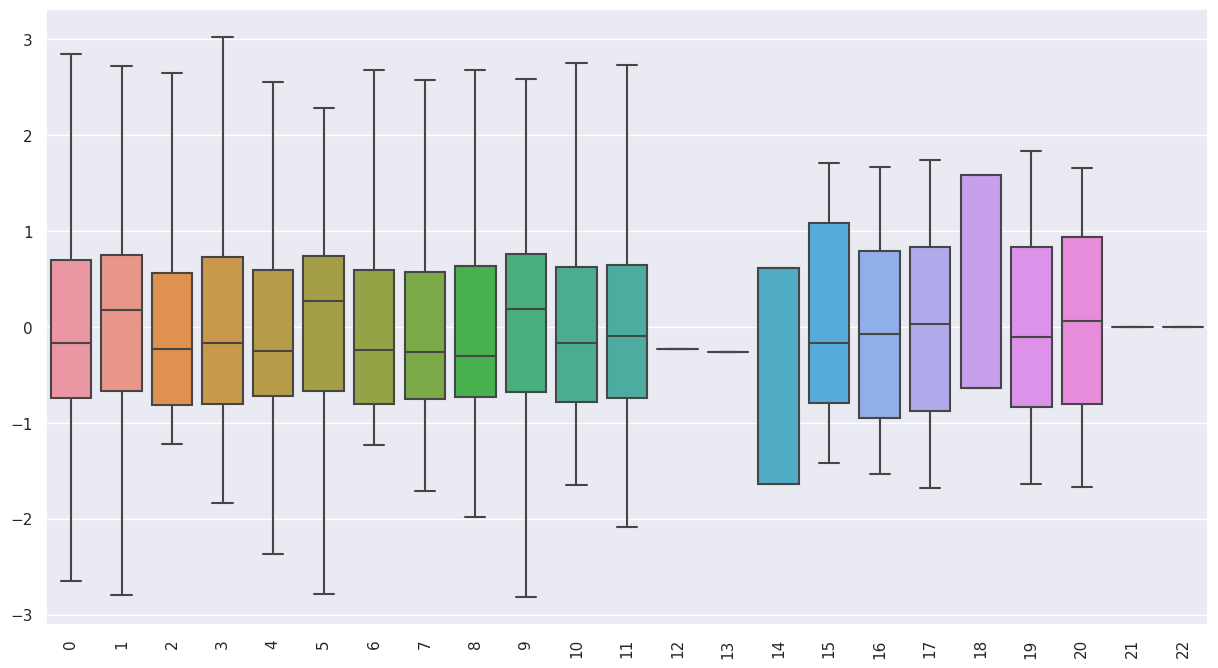

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_train_scaled is a DataFrame
plt.figure(figsize=(15, 8))
sns.boxplot(data=pd.DataFrame(X_train_scaled_clipped))
plt.xticks(rotation=90)
plt.show()

In [200]:
import numpy as np

# Z-score method
from scipy import stats

z_scores = np.abs(stats.zscore(X_test_scaled))
outliers_z = np.where(z_scores > 3)  # Z-score threshold can be 2.5 or 3
print("Outliers detected using Z-score method:", outliers_z)

# IQR method
Q1 = np.percentile(X_test_scaled, 25, axis=0)
Q3 = np.percentile(X_test_scaled, 75, axis=0)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = np.where((X_test_scaled < lower_bound) | (X_test_scaled > upper_bound))
print("Outliers detected using IQR method:", outliers_iqr)


Outliers detected using Z-score method: (array([   0,    4,   17, ..., 9601, 9606, 9608]), array([13, 13, 11, ..., 13,  2,  4]))
Outliers detected using IQR method: (array([   0,    0,    4, ..., 9608, 9608, 9608]), array([12, 13, 12, ...,  4,  5,  8]))


### Data Preprocessing: Clipping Scaled Test Data

In the context of machine learning research, preprocessing data to handle outliers is critical for ensuring model robustness and performance. This section focuses on a specific preprocessing technique known as clipping, applied to the scaled test dataset (`X_test_scaled`) using Python.

#### Clipping Process

The provided code snippet employs the `np.clip()` function to limit the values of `X_test_scaled` within specified lower and upper bounds derived from the Interquartile Range (IQR) method:

1. **Understanding Clipping**: Clipping is a data transformation technique that constrains values to a specified range. This is particularly useful for handling outliers identified during data preprocessing.

2. **Implementation**: The `np.clip(X_test_scaled, lower_bound, upper_bound)` function call restricts the values of `X_test_scaled` to lie between `lower_bound` and `upper_bound`, effectively truncating any outliers that exceed these boundaries.

3. **Rationale**: By applying clipping, outliers that may adversely affect model training and evaluation are mitigated. This ensures that the test data remains within a reasonable range consistent with the data distribution observed in the training set, as defined by the IQR method.

#### Importance and Application

In research papers, documenting the clipping technique underscores the rigor and transparency of data preprocessing methodologies. It demonstrates proactive measures taken to enhance the reliability and interpretability of machine learning models by addressing outliers in a systematic and controlled manner. Moreover, incorporating clipping into the preprocessing pipeline ensures consistency in data handling practices, thereby facilitating reproducibility and comparability of research findings across different studies or datasets. This approach not only improves the robustness of machine learning models but also promotes trust and confidence in the validity of research outcomes within the scientific community.

In [201]:
X_test_scaled_clipped=np.clip(X_test_scaled, lower_bound, upper_bound)

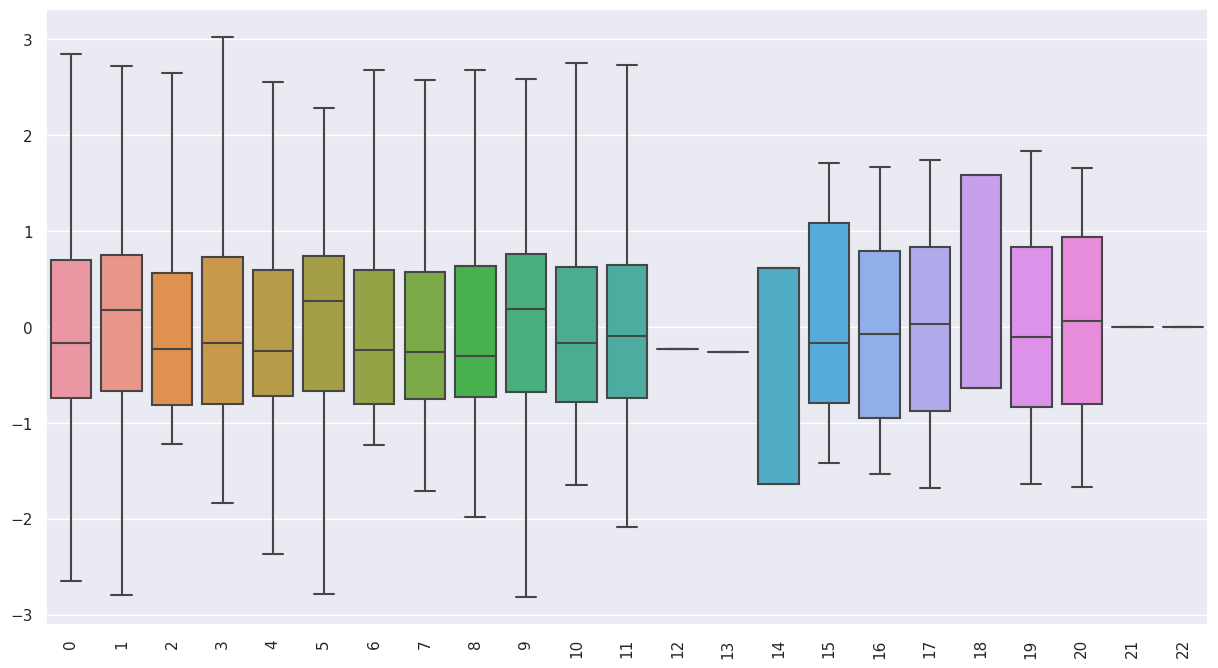

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_train_scaled is a DataFrame
plt.figure(figsize=(15, 8))
sns.boxplot(data=pd.DataFrame(X_train_scaled_clipped))
plt.xticks(rotation=90)
plt.show()

### Neural Network Model Definition Using TensorFlow and Keras

In machine learning research, TensorFlow and Keras are pivotal for building neural network models. Here’s a concise outline of the process:

1. **Importing Libraries**: TensorFlow (`tf`) and Keras provide the foundational tools for constructing deep learning architectures.

2. **Sequential Model Initialization**: Initialize a Sequential model using `Sequential()`.

3. **Adding Layers**: Layers are added sequentially using `model.add(Dense(units=...))`, where `Dense` represents a fully connected layer.

4. **Compilation**: Compile the model with `model.compile(optimizer='...', loss='...', metrics=['...'])` to set optimizer, loss function, and evaluation metrics.

Using these steps, researchers can efficiently define, compile, and customize neural networks tailored to specific research objectives and datasets. This approach ensures clarity and reproducibility in documenting model construction for academic and practical applications.

In [254]:
import tensorflow
from tensorflow import keras
from keras import Sequential 
from keras.layers import Dense

### Neural Network Architecture and Compilation for Regression Using TensorFlow and Keras

This section outlines the construction and configuration of a neural network model using TensorFlow and Keras, designed specifically for regression tasks.

#### Model Architecture

The neural network is structured as a sequential model, meaning layers are stacked sequentially. It consists of multiple dense (fully connected) layers, each defined with 100 neurons (`hidden_units`). These layers employ the 'selu' (Scaled Exponential Linear Unit) activation function, which helps in addressing vanishing gradient problems and accelerating convergence during training.

Each dense layer is initialized with 'he_normal', a method that initializes weights to maintain variance during training, and includes L2 regularization (`keras.regularizers.l2(0.001)`) to prevent overfitting by penalizing large weights.

The final layer of the model is a single neuron with a 'linear' activation function. This setup is ideal for regression tasks where the model predicts continuous output values.

#### Compilation

After defining the model architecture, it is compiled to prepare it for training:

- **Optimizer**: The model is optimized using the Adam optimizer (`'adam'`). Adam adapts the learning rate dynamically based on the gradients of the model parameters, making it suitable for a wide range of machine learning tasks.

- **Loss Function**: The loss function chosen for optimization is Mean Absolute Error (`'mae'`). MAE calculates the average magnitude of errors between predicted and actual values, providing a straightforward measure of model performance for regression tasks.

#### Conclusion

This concise description of the neural network model and its compilation highlights the structured approach to designing models for regression in machine learning research. By detailing these steps, researchers can effectively communicate their methodology and facilitate reproducibility and transparency in their findings.

In [222]:
from tensorflow import keras

hidden_units = 100

model = keras.Sequential([
  keras.layers.Dense(hidden_units, activation='selu', input_dim=23,kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(0.001)),
 
    keras.layers.Dense(hidden_units, activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(0.001)),
 
    keras.layers.Dense(hidden_units, activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(0.001)),
  
     keras.layers.Dense(hidden_units, activation='selu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(0.001)),

    
  keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mae')

### Model Training and Evaluation in Neural Networks

In the context of machine learning research using neural networks, training and evaluating models are fundamental processes to gauge their performance and suitability for specific tasks.

#### Model Training

Training a neural network involves optimizing its parameters (weights and biases) using a training dataset (`X_train_scaled_clipped` and `y_train`). During training:

- **Epochs**: Refers to the number of times the entire dataset is passed forward and backward through the neural network. Each epoch contributes to refining the model's ability to learn from the data and improve its predictions.
  
- **Batch Size**: Specifies the number of samples processed together before updating the model's parameters. This parameter influences the speed and stability of the training process.

#### Model Evaluation

After training, the model's performance is evaluated using a separate dataset called the test set (`X_test_scaled_clipped` and `y_test`). Evaluation involves:

- **Loss Calculation**: The chosen metric (in this case, Mean Absolute Error or MAE) quantifies the discrepancy between predicted and actual values. MAE measures the average magnitude of errors in the predictions, providing a straightforward assessment of model accuracy for regression tasks.



In [234]:
history = model.fit(X_train_scaled_clipped, y_train, validation_data=(X_test_scaled_clipped, y_test), 
                    epochs=50, batch_size=32,)

# Evaluate the model
loss = model.evaluate(X_test_scaled_clipped, y_test)
print("Test MAE loss:", loss)


Epoch 1/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 23.1607 - val_loss: 29.5553
Epoch 2/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 22.9788 - val_loss: 29.8477
Epoch 3/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 23.4457 - val_loss: 30.4212
Epoch 4/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 23.0030 - val_loss: 30.0188
Epoch 5/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 23.1630 - val_loss: 29.8625
Epoch 6/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 23.3173 - val_loss: 29.6238
Epoch 7/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 22.8582 - val_loss: 29.3444
Epoch 8/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 22.7273 - val_loss: 29.2889
Epoch 9/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 23.0492 - val_loss: 29.7492
Epoch 10/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 23.0664 - val_loss: 29.4159
Epoch 11/50
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 22.7514 - val_loss: 30.4373
Epoch 12

### Evaluation Metrics for Regression Models

In machine learning research, evaluating the performance of regression models is crucial for assessing their effectiveness in predicting continuous outcomes. This section focuses on using standard evaluation metrics from Scikit-Learn to assess the performance of a neural network model trained on scaled data (`X_test_scaled_clipped`) and compared against actual target values (`y_test`).

#### Mean Absolute Error (MAE)

Mean Absolute Error (MAE) measures the average magnitude of errors between predicted and actual values. It provides a straightforward assessment of prediction accuracy by averaging the absolute differences between predicted and true values. A lower MAE indicates that the model's predictions are closer to the actual values.

#### R-squared (R2) Score

R-squared (R2) score quantifies the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features) in the model. It ranges from 0 to 1, where a score closer to 1 indicates that the model explains a larger proportion of the variance in the target variable. A higher R2 score indicates a better fit of the model to the data.

#### Practical Application

In the context of evaluating a neural network model:
- **Mean Absolute Error (MAE)** (`mean_absolute_error(y_test, y_pred)`) provides an intuitive measure of prediction accuracy in terms of absolute deviations from actual values.
  
- **R-squared (R2) Score** (`r2_score(y_test, y_pred)`) assesses how well the model's predictions approximate the actual data variability. Higher R2 scores signify better model performance.

#### Significance

These metrics are essential for:
- **Comparing Models**: Facilitating comparisons between different models to identify the best-performing one.
- **Optimizing Models**: Guiding the tuning of model parameters and architectures to enhance predictive accuracy.
- **Interpreting Results**: Providing insights into the model's ability to capture and explain underlying patterns in the data.


In [235]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled_clipped)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2*100)


301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Absolute Error (MAE): 25.838184754005297
R-squared (R2) score: 95.8401194819328


### Visualization of Model Predictions: True vs. Predicted Values

Visualizing the predictions of machine learning models is essential in research to gain insights into how well the model captures patterns in the data and to understand its predictive accuracy. This section discusses the visualization of true and predicted values using matplotlib in Python, focusing on a comparison between actual target values (`y_test`) and model predictions (`y_pred`).

#### Plotting Methodology

The visualization employs a scatter plot to display the relationship between `X_test_scaled_clipped` (input data) and the target values:

- **Scatter Plots**: 
  - **True Values (y_test)**: Represented in blue, indicating the actual target values from the test dataset.
  - **Predicted Values (y_pred)**: Represented in red, showing the model's predictions for the same input data.
  
  Both scatter plots use transparency (`alpha=0.3`) to visualize overlapping data points clearly. The size of each point (`s=10`) enhances visibility without overshadowing individual data points.



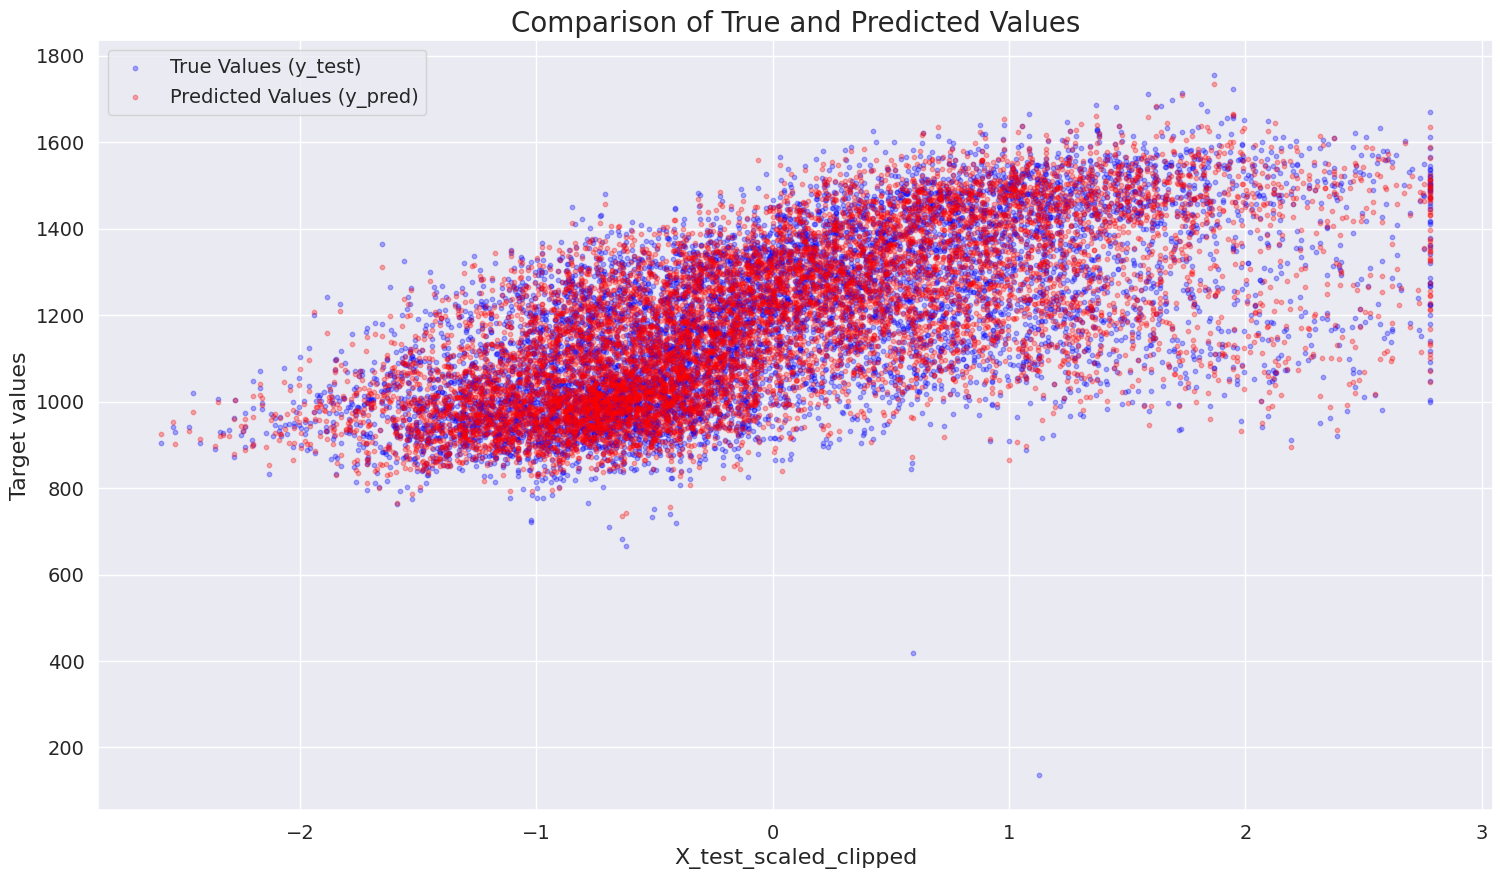

In [248]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming X_test_scaled_clipped, y_test, and y_pred are numpy arrays or pandas Series
# Convert pandas Series to numpy arrays if needed
if isinstance(X_test_scaled_clipped, pd.Series):
    X_test_scaled_clipped = X_test_scaled_clipped.values
if isinstance(y_test, pd.Series):
    y_test = y_test.values
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.values

# If X_test_scaled_clipped is multi-dimensional, select one dimension for plotting
x = X_test_scaled_clipped[:, 0] if X_test_scaled_clipped.ndim > 1 else X_test_scaled_clipped

plt.figure(figsize=(18, 10))

# Scatter plot for y_test
plt.scatter(x, y_test, color='blue', alpha=0.3, label='True Values (y_test)', s=10)

# Scatter plot for y_pred
plt.scatter(x, y_pred, color='red', alpha=0.3, label='Predicted Values (y_pred)', s=10)

# Adding labels and title
plt.xlabel('X_test_scaled_clipped', fontsize=16)
plt.ylabel('Target values', fontsize=16)
plt.title('Comparison of True and Predicted Values', fontsize=20)
plt.legend(fontsize=14)
plt.grid(True)

# Adjusting tick parameters for better readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()
